In [0]:
import json
import pandas

stores = pandas.read_csv("stores.csv")
stores.head(10)


-17076


,公司統一編號,公司名稱,分公司統一編號,分公司名稱,分公司地址,分公司狀態
0,22555003,統一超商股份有限公司,1846195,台北市第一七０分公司,臺北市士林區文林路一六九號一樓,1
1,22555003,統一超商股份有限公司,16080140,台北巿第三四二分公司,臺北市松山區健康路224號１樓,1
2,22555003,統一超商股份有限公司,16080155,台北縣第２５５分公司,新北市三峽區永館里９鄰民生街１０２號１樓,3
3,22555003,統一超商股份有限公司,16080161,台北縣第２５６分公司,新北市三峽區鳶山里十二鄰中山路１８６號１樓,1
4,22555003,統一超商股份有限公司,16080177,新竹市第２６分公司,新竹市民富里７鄰北大路３４２號,1
5,22555003,統一超商股份有限公司,16080182,新竹市第２７分公司,新竹巿新民里北大路２８６號,3
6,22555003,統一超商股份有限公司,16080198,新竹巿第二十八分公司,新竹巿金華里９鄰田美三街五十號,3
7,22555003,統一超商股份有限公司,16080253,高雄巿第１５２分公司,高雄市小港區鳳源里鳳林路181、183號1樓,1
8,22555003,統一超商股份有限公司,16080269,高雄巿第１５１分公司,高雄市前鎮區草衙里后安路１４６號１樓,1
9,22555003,統一超商股份有限公司,16080275,桃園縣第４５分公司,桃園市蘆竹區南山路三段306、308號1樓,1


In [0]:
from IPython.display import display, HTML
pandas.set_option("max_rows", 100)

# clean
stores_alive = stores[stores['分公司狀態']==1].copy()
stores_alive["行政區"] = stores_alive["分公司地址"].str.slice(0, 3)
stores_alive["行政區"] = stores_alive["行政區"].str.replace("巿", "市", regex=False)
stores_alive["行政區"] = stores_alive["行政區"].str.replace("台", "臺", regex=False)
stores_alive["行政區"] = stores_alive["行政區"].str.replace("苗栗市", "苗栗縣", regex=False)
stores_alive["行政區"] = stores_alive["行政區"].str.replace("彰化市", "彰化縣", regex=False)
stores_alive["行政區"] = stores_alive["行政區"].str.replace("臺北縣", "新北市", regex=False)
stores_alive["行政區"] = stores_alive["行政區"].str.replace("臺中縣", "臺中市", regex=False)
stores_alive["行政區"] = stores_alive["行政區"].str.replace("臺南縣", "臺南市", regex=False)
stores_alive["行政區"] = stores_alive["行政區"].str.replace("高雄縣", "高雄市", regex=False)
stores_alive["行政區"] = stores_alive["行政區"].str.replace("桃園縣", "桃園市", regex=False)

# region
region = {"基隆市":"北", "新北市":"北", "臺北市":"北", "桃園市":"北", "新竹縣":"北", "新竹市":"北", "宜蘭縣":"北",
         "苗栗縣":"中", "臺中市":"中", "彰化縣":"中", "南投縣":"中", "雲林縣":"中",
         "嘉義縣":"南", "嘉義市":"南", "臺南市":"南", "高雄市":"南", "屏東縣":"南",
         "花蓮縣":"東", "臺東縣":"東", "澎湖縣":"外", "金門縣":"外", "連江縣":"外"}
stores_alive["區域"] = stores_alive["行政區"].map(region)

# brand
brand = {"統一超商股份有限公司":"7-11", "全家便利商店股份有限公司":"全家", "萊爾富國際股份有限公司":"萊爾富", "來來超商股份有限公司":"OK"}
stores_alive["品牌"] = stores_alive["公司名稱"].map(brand)

# sort
stores_alive["區域"] = pandas.Categorical(stores_alive["區域"], ["北", "中", "南", "東", "外"])


test = stores_alive.groupby(["區域","行政區","品牌"]).size()
display(test)

區域  行政區  品牌  
北   基隆市  7-11     79
         OK       66
         全家       54
         萊爾富       8
    宜蘭縣  7-11     96
         OK       20
         全家       53
         萊爾富      13
    新北市  7-11    960
         OK      149
         全家      747
         萊爾富     293
    新竹市  7-11    129
         OK       10
         全家       75
         萊爾富      57
    新竹縣  7-11    159
         OK       38
         全家       70
         萊爾富      57
    桃園市  7-11    605
         OK      122
         全家      270
         萊爾富     238
    臺北市  7-11    806
         OK       86
         全家      504
         萊爾富     164
中   南投縣  7-11     97
         OK       18
         全家       46
         萊爾富      11
    彰化縣  7-11    200
         OK       39
         全家       72
         萊爾富      38
    臺中市  7-11    676
         OK      100
         全家      399
         萊爾富      97
    苗栗縣  7-11    115
         OK       18
         全家       64
         萊爾富      32
    雲林縣  7-11    106
         OK        7
         全家       54

In [0]:
display("台".encode("utf-8"))
display("巿".encode("utf-8"))
pandas.set_option("max_rows", 100)

b'\xe5\xb8\x82'

b'\xe5\xb7\xbf'

品牌       7-11     OK     全家    萊爾富
區域 行政區                            
北  基隆市   79.0   66.0   54.0    8.0
   宜蘭縣   96.0   20.0   53.0   13.0
   新北市  960.0  149.0  747.0  293.0
   新竹市  129.0   10.0   75.0   57.0
   新竹縣  159.0   38.0   70.0   57.0
   桃園市  605.0  122.0  270.0  238.0
   臺北市  806.0   86.0  504.0  164.0
中  南投縣   97.0   18.0   46.0   11.0
   彰化縣  200.0   39.0   72.0   38.0
   臺中市  676.0  100.0  399.0   97.0
   苗栗縣  115.0   18.0   64.0   32.0
   雲林縣  106.0    7.0   54.0   17.0
南  嘉義市   63.0    4.0   29.0    8.0
   嘉義縣   90.0    4.0   31.0   15.0
   屏東縣  151.0    8.0   61.0   22.0
   臺南市  456.0    6.0  151.0   41.0
   高雄市  560.0   48.0  253.0   98.0
東  臺東縣   54.0    1.0   26.0    NaN
   花蓮縣   88.0    NaN   36.0    NaN
外  澎湖縣   27.0    NaN    8.0    NaN
   連江縣    7.0    NaN    NaN    NaN
   金門縣   22.0    NaN    3.0    2.0

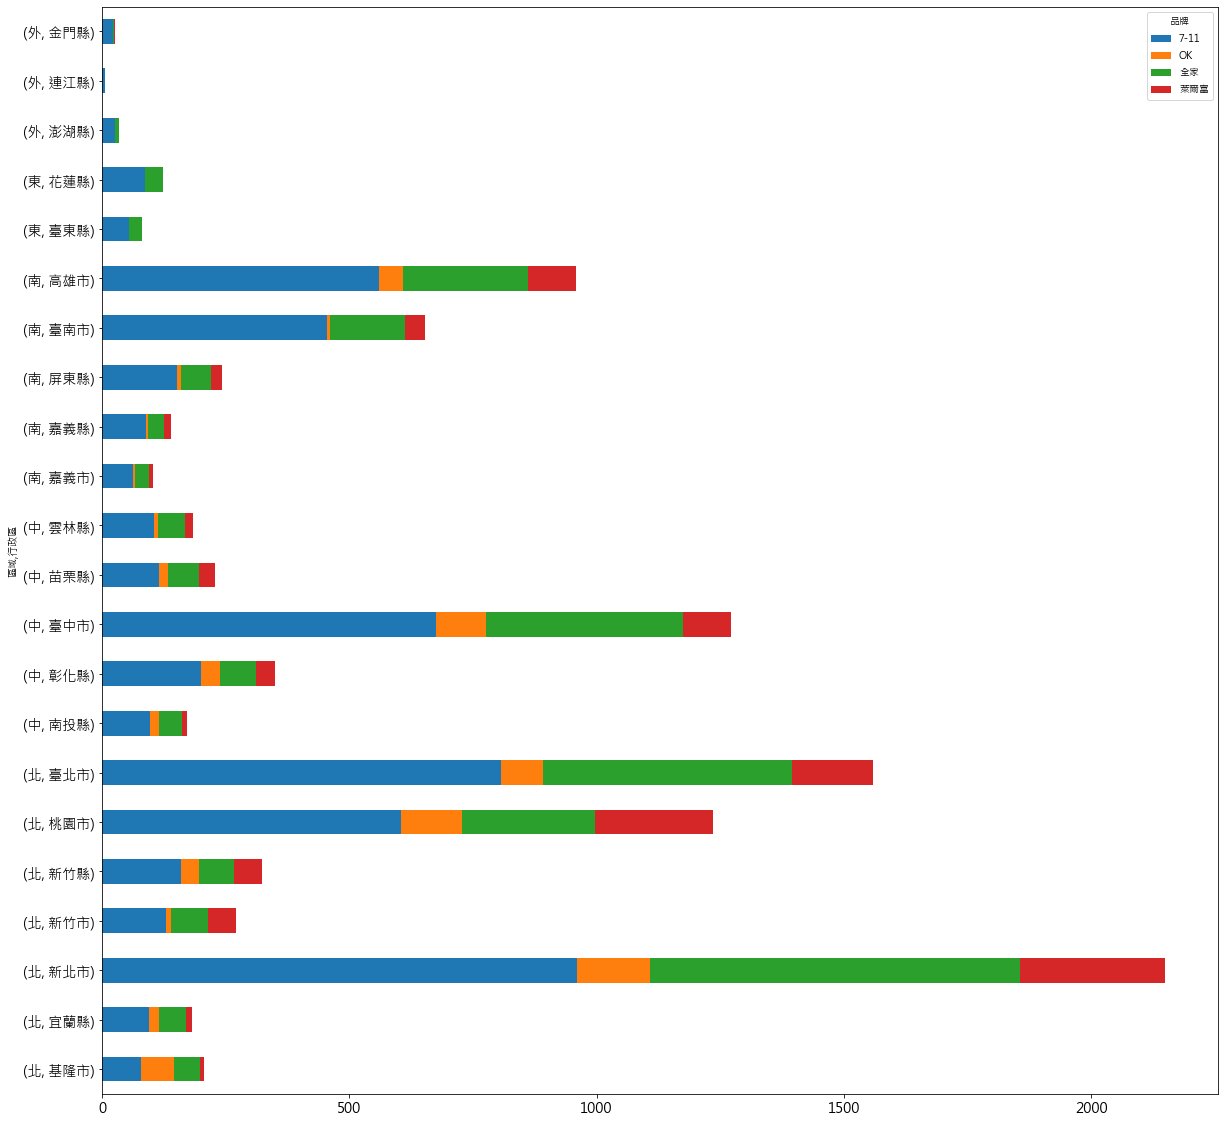

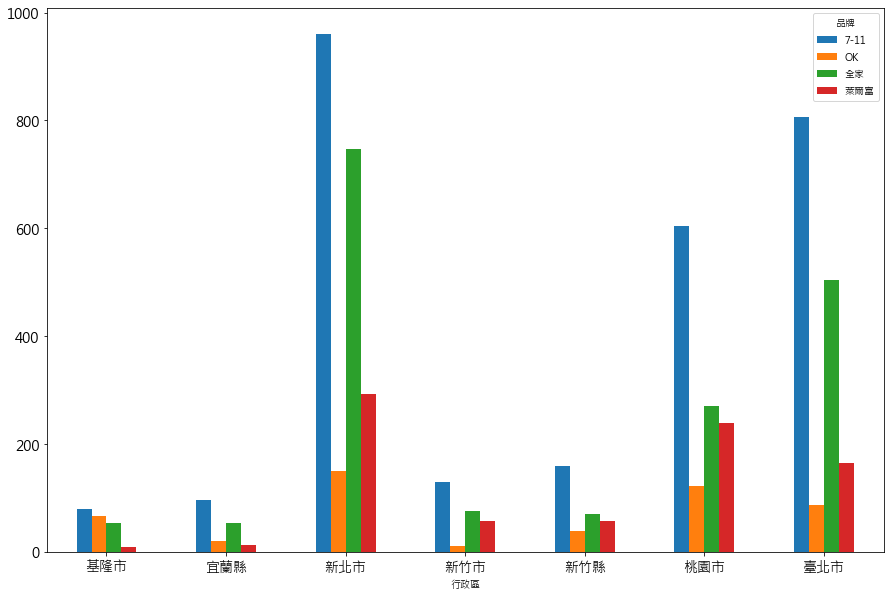

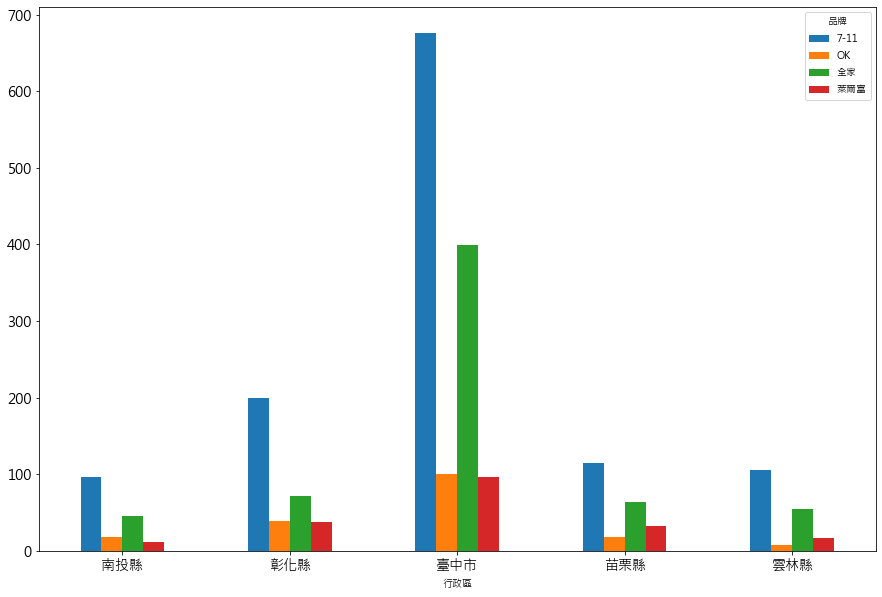

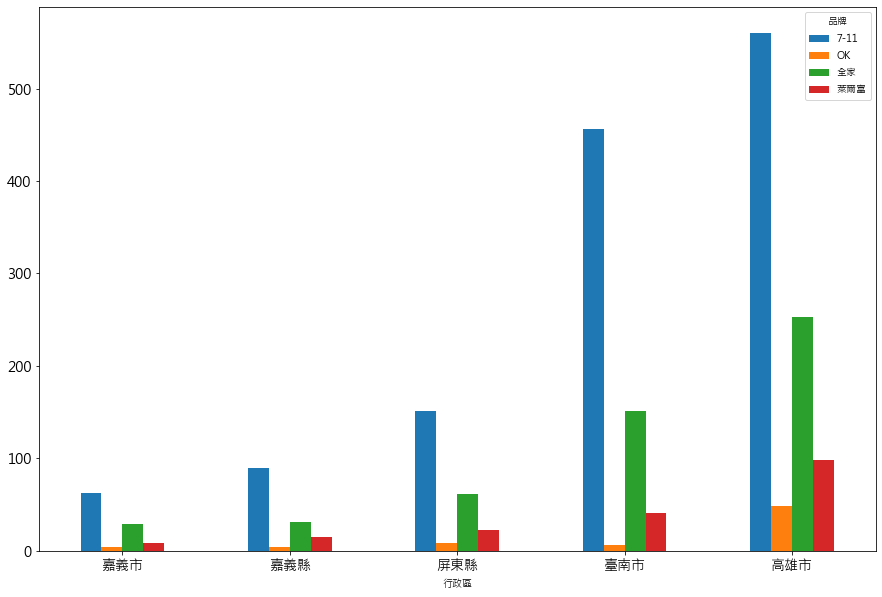

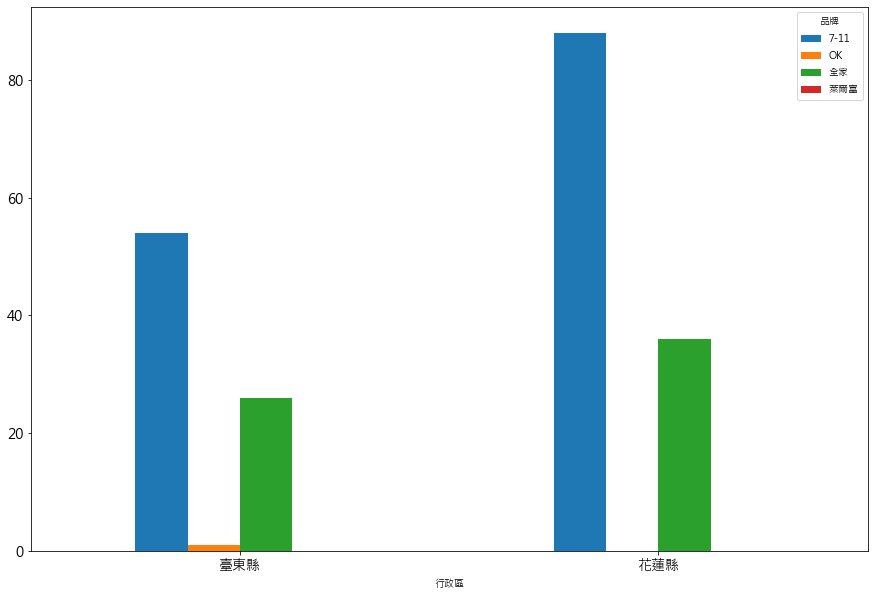

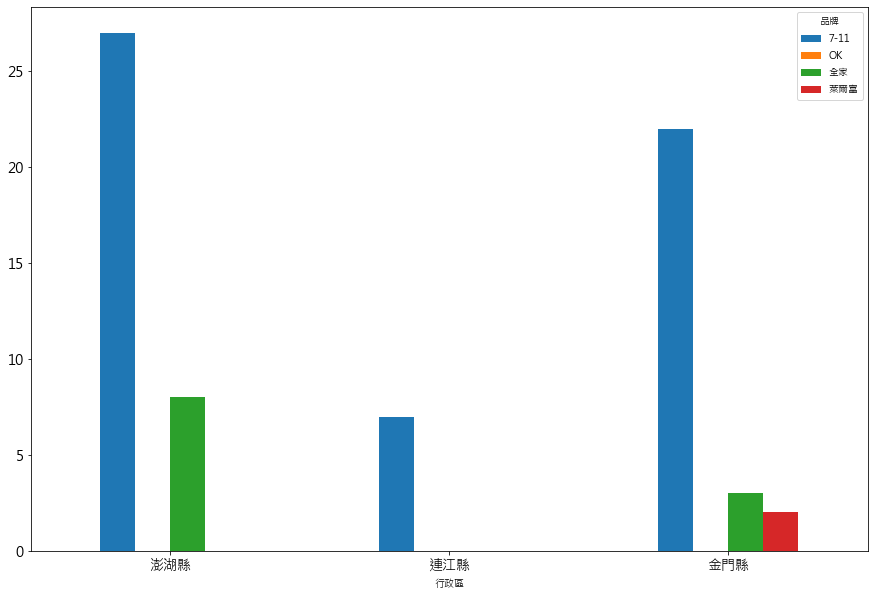

In [0]:
import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
#plt.rcParams['axes.unicode_minus'] = False

barh = stores_alive.groupby(["區域","行政區","品牌"]).size().unstack(level=-1)
display(barh)
#display(test.loc['北'])

barh.plot(kind="barh", stacked=True, figsize=(20,20), fontsize=14)
barh.loc['北'].plot(kind="bar", figsize=(15,10), rot=0, fontsize=14)
barh.loc['中'].plot(kind="bar", figsize=(15,10), rot=0, fontsize=14)
barh.loc['南'].plot(kind="bar", figsize=(15,10), rot=0, fontsize=14)
barh.loc['東'].plot(kind="bar", figsize=(15,10), rot=0, fontsize=14)
barh.loc['外'].plot(kind="bar", figsize=(15,10), rot=0, fontsize=14)

區域           北                                                              \
行政區        基隆市       宜蘭縣       新北市       新竹市       新竹縣       桃園市       臺北市   
品牌                                                                           
7-11  0.381643  0.527473  0.446719  0.476015  0.490741  0.489879  0.516667   
OK    0.318841  0.109890  0.069335  0.036900  0.117284  0.098785  0.055128   
全家    0.260870  0.291209  0.347604  0.276753  0.216049  0.218623  0.323077   
萊爾富   0.038647  0.071429  0.136342  0.210332  0.175926  0.192713  0.105128   

區域           中                      ...         南                      \
行政區        南投縣       彰化縣       臺中市  ...       嘉義市       嘉義縣       屏東縣   
品牌                                  ...                                 
7-11  0.563953  0.573066  0.531447  ...  0.605769  0.642857  0.623967   
OK    0.104651  0.111748  0.078616  ...  0.038462  0.028571  0.033058   
全家    0.267442  0.206304  0.313679  ...  0.278846  0.221429  0.252066   
萊爾富   0.063953  0.108883  0.076258  ...  0.076923  0.107143  0.090909   

區域                               東                   外                 
行政區        臺南市       高雄市       臺東縣       花蓮縣       澎湖縣  連江縣       金門縣  
品牌                                                                     
7-11  0.697248  0.583942  0.666667  0.709677  0.771429  1.0  0.814815  
OK    0.009174  0.050052  0.012346       NaN       NaN  NaN       NaN  
全家    0.230887  0.263816  0.320988  0.290323  0.228571  NaN  0.111111  
萊爾富   0.062691  0.102190       NaN       NaN       NaN  NaN  0.074074  

[4 rows x 22 columns]

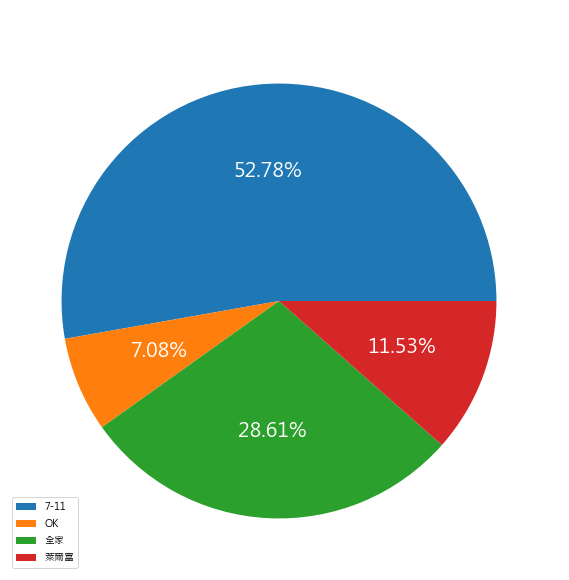

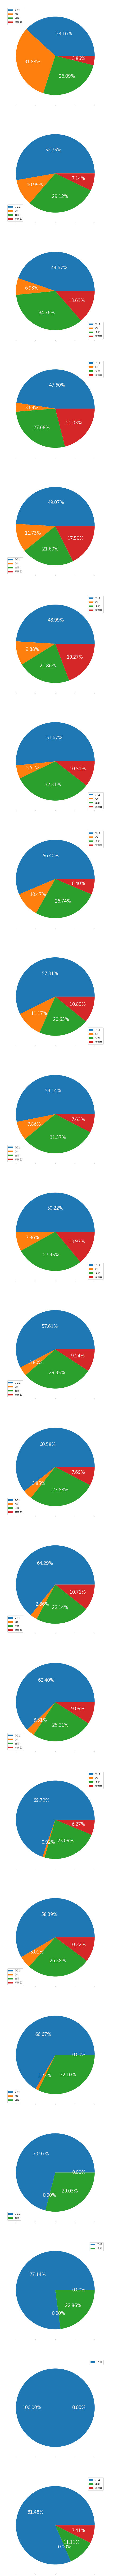

In [0]:
import numpy
import matplotlib

total = stores_alive.groupby(["品牌"]).size().plot(kind="pie", autopct='%.2f%%', figsize=(10,10), fontsize=20, textprops={'color':"w"}, legend=True)
total.set_ylabel("")
total.set_title(label="全國", size=20, color="w")

# region
pie = stores_alive.groupby(["區域","行政區","品牌"]).size()
#display(pie/pie.groupby(["行政區"]).sum())
pie = (pie/pie.groupby(["行政區"]).sum()).unstack(level=[0,1])
display(pie)
axes = pie.plot(kind="pie", subplots=True, layout=(22,1), autopct='%.2f%%', figsize=(10,200), fontsize=20, textprops={'color':"w"})

for ax, col in zip(axes[:,0], pie.columns):
    ax.set_ylabel("")
    ax.set_title(label=col[1], size=20, color="w")
    


區域,北,中,南,東,外
品牌,,,,,
7-11,0.478070,0.541251,0.628871,0.692683,0.811594
OK,0.082827,0.082502,0.033349,0.004878,NaN
全家,0.299089,0.287851,0.250119,0.302439,0.159420
萊爾富,0.140013,0.088395,0.087661,NaN,0.028986


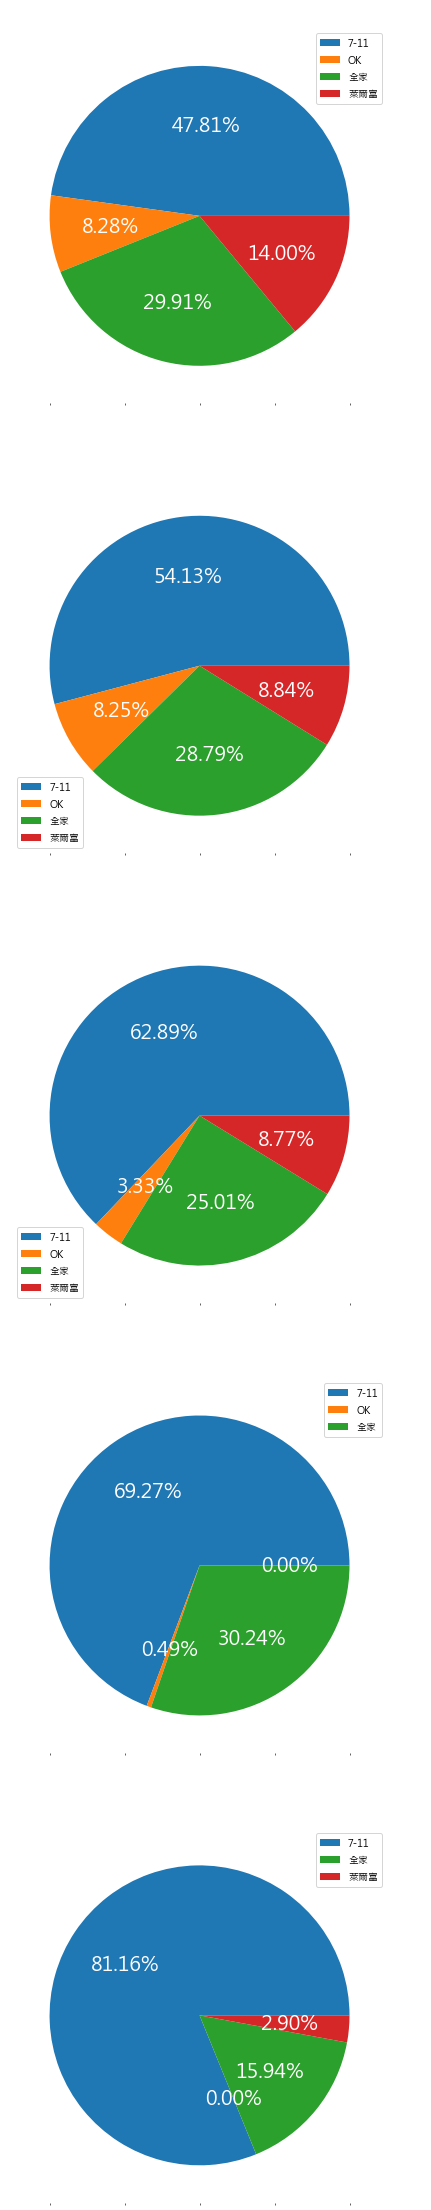

In [0]:
# NEWS
pie_news = stores_alive.groupby(["區域","品牌"]).size()
pie_news = (pie_news / pie_news.groupby(["區域"]).sum()).unstack(level=0)
display(pie_news)

news = pie_news.plot(kind="pie", subplots=True, layout=(5,1), autopct='%.2f%%', figsize=(10,40), fontsize=20, textprops={'color':"w"})

for ax, col in zip(news[:,0], pie_news.columns):
    ax.set_ylabel("")
    ax.set_title(label=col, size=20, color="w")

品牌,7-11,OK,全家,萊爾富
行政區,,,,
南投縣,0.563953,0.104651,0.267442,0.063953
嘉義市,0.605769,0.038462,0.278846,0.076923
嘉義縣,0.642857,0.028571,0.221429,0.107143
基隆市,0.381643,0.318841,0.260870,0.038647
宜蘭縣,0.527473,0.109890,0.291209,0.071429
屏東縣,0.623967,0.033058,0.252066,0.090909
彰化縣,0.573066,0.111748,0.206304,0.108883
新北市,0.446719,0.069335,0.347604,0.136342
新竹市,0.476015,0.036900,0.276753,0.210332


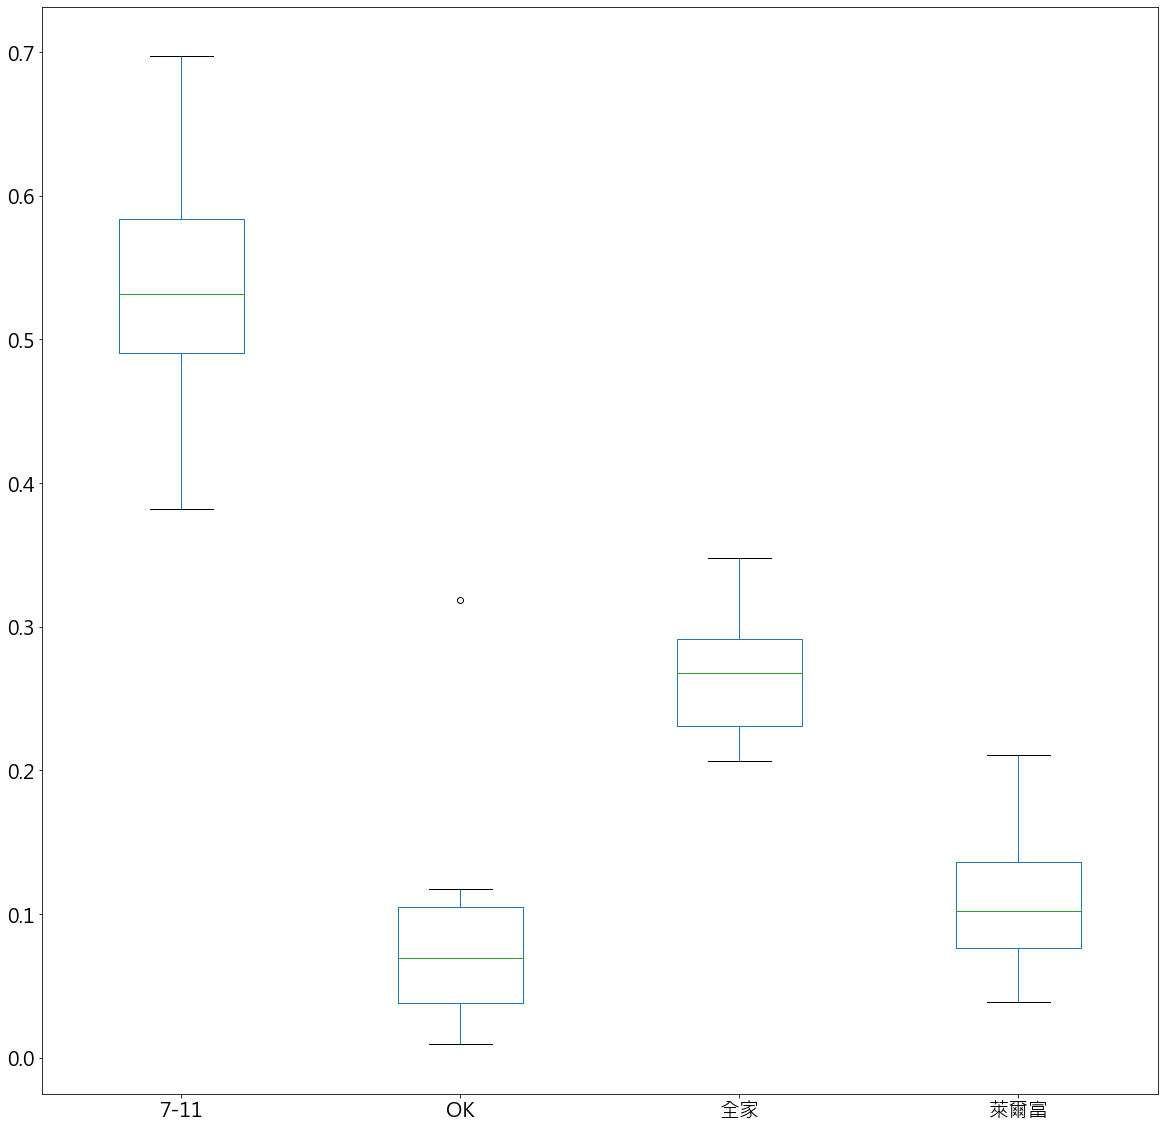

In [0]:
box = stores_alive[stores_alive["區域"].isin(["北", "中", "南"])].groupby(["行政區","品牌"]).size()
box = (box / box.groupby(["行政區"]).sum()).unstack(level=-1)
display(box)
box.plot(kind="box",figsize=(20,20), fontsize=20)